In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import tensorflow_datasets as tfds

import iraklis7_nn.config as config
import iraklis7_nn.dataset as dataset
import iraklis7_nn.plots as plots

2026-02-02 15:05:47.925 | INFO     | iraklis7_nn.config:<module>:11 - PROJ_ROOT path is: /Users/iraklis/git/iraklis7_nn


In [3]:
input_path: Path = config.RAW_DATA_DIR
output_path: Path = config.RAW_DATA_DIR 
figures_path: Path = config.FIGURES_DIR

### Load data

In [4]:
ds, ds_info = dataset.make_dataset_raw()

In [5]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/Users/iraklis/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


### Inspect data

In [6]:
print(type(ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [7]:
#df = pd.DataFrame([(image.numpy(), label.numpy()) for image, label in ds], columns=['images', 'labels'])
df = tfds.as_dataframe(
    ds = ds, ds_info = ds_info
)
print(df.head())
print(f"The dataset contains {len(df)} images and their corresponding labels")

2026-02-02 15:06:46.188755: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2026-02-02 15:06:55.765947: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


                                               image  label
0  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      2
1  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      0
2  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      4
3  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      8
4  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      7
The dataset contains 70000 images and their corresponding labels


### Plot a sample of the data

In [8]:
df_samples = df.sample(30)
# Index needs to be reset for plots.plot_bmp_grid to work
df_samples = df_samples.reset_index()

2026-02-02 15:07:05.223 | INFO     | iraklis7_nn.plots:plot_bmp_grid:75 - Saving plot to: /Users/iraklis/git/iraklis7_nn/reports/figures/mnist_ds_sample.png


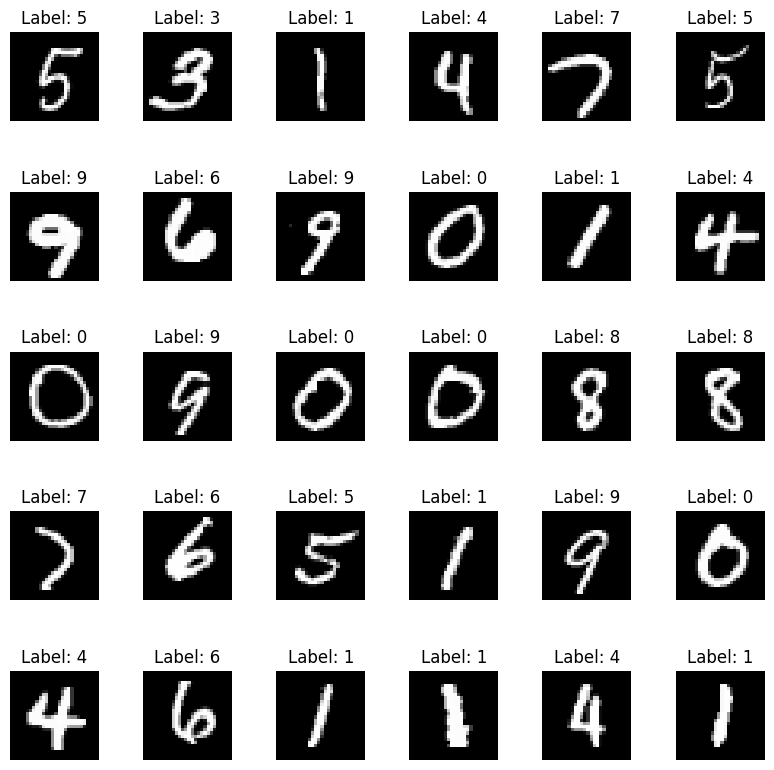

In [9]:
# Visualize a few samples from the dataset
sample_path = figures_path.joinpath(config.SAMPLE_PLOT)
plots.plot_bmp_grid(df_samples.image, df_samples.label, predictions=None, columns=6, height=8, width=8, show=True, output_path=sample_path)

In [10]:
raw_path = output_path.joinpath(config.RAW_SET)
ds.save(str(raw_path))